# Hackathon 1 

In this notebook, you are going to train a RandomForest classifier for medical diagnostics. The dataset used is a classical datascience benchmark dataset. It is used for many years already to get a feeling of how certain concepts in datascience work.

## What you will do

First, you are going to load the data set fromo github. Then, you'll use that dataset to train a classifier to make predictions using all the features (read: columns).

You will use typical data science evaluation metrics to evaluate the models performance. Without too much detail: a higher score is better.

We score on Accuracy, Receiver-Operator-Characteristics, Precision, Recall and F1-score.

### After training

Once you have a trained model, we are going to save that model. The saved model will be used to serve it in an API.

In [23]:
# First load in your packages

import pandas as pd # To display your dataset
from sklearn.model_selection import train_test_split # to split the data for training and evaluation
from sklearn.preprocessing import StandardScaler # To scale down values with Z-score (using mean and std deviation)

from sklearn.ensemble import RandomForestClassifier # The classifier you'll be using

from get_model_metrics import calc_metrics # Single function to calculate all evaluation metrics

import matplotlib.pyplot as plt

In [2]:
# Seed for reproducability
RANDOM_SEED = 42

### Load the data

In data science we have agreed that we use certain abbrevations when we create certain objects and instances. For example, when we want to use pandas, we import it always `import pandas as pd`. And when we create a dataframe, we always use `df` to create a dataframe object.

Data scientists are notoriously systematic...

In [20]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv"
)

In [21]:
# show the first 5 rows of a data frame using df.head()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [27]:
counts = df.diagnosis.value_counts()
counts

B    357
M    212
Name: diagnosis, dtype: int64

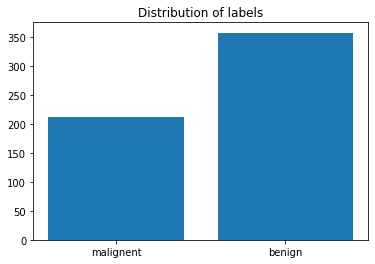

In [37]:
labels = ["malignent", "benign"]
values = [counts['M'], counts['B']]
plt.bar(labels, values)
plt.title("Distribution of labels")
plt.show()

### A little feature engineering

Computers use numbers to calculate, they are not so well equiped to interpret text for calculations directly. In order to help the computer, we want the values in each column to be a numeric representation.

In [38]:
# Integer encode the target variable diagnosis
df["diagnosis_int"] = (df["diagnosis"] == "M").astype("int")

In [39]:
# Drop/ remove the previous text column
df.drop(["diagnosis", "Unnamed: 32"], axis=1, inplace=True)

In [40]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_int
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [41]:
# Split feature and target vectors
X = df.drop("diagnosis_int", 1)
y = df["diagnosis_int"]

/var/folders/ht/j5f6jtbj79j3jsb_rlhx9pbr0000gp/T/ipykernel_22842/3958428180.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop("diagnosis_int", 1)


## Prep the data for training and train.

In [42]:
# Split data in train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED
)

In [43]:
# scale the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Train the model
model = RandomForestClassifier(criterion="entropy", random_state=RANDOM_SEED)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [45]:
# Evaluate your model
metrics = calc_metrics(model, X_test_scaled, y_test)
print(metrics)

{'acc': 0.9649122807017544, 'roc': 0.9580740255486406, 'prec': 0.975609756097561, 'rec': 0.9302325581395349, 'f1': 0.9523809523809524}


In [46]:
metrics_df = pd.DataFrame(metrics, index=["all"])

In [47]:
metrics_df

,acc,roc,prec,rec,f1
all,0.964912,0.958074,0.97561,0.930233,0.952381


## You have now trained a model!

Yeah, it might be that this is your first machine learning model ever so take a moment to let that sink in.

## What does it all mean?

You created a Random Forest classification model. This model's job is to take input data denoted as `X` and to use that data to return a prediction. Here let me show you:

In [15]:
X_example = X_train_scaled[0]
print(f"Your model is going to get this input: \n {X_example}")

Your model is going to get this input: 
 [-0.23712699 -1.44075296 -0.43531947 -1.36208497 -1.1391179   0.78057331
  0.71892128  2.82313451 -0.11914956  1.09266219  2.45817261 -0.26380039
 -0.01605246 -0.47041357 -0.47476088  0.83836493  3.25102691  8.43893667
  3.39198733  2.62116574  2.06120787 -1.23286131 -0.47630949 -1.24792009
 -0.97396758  0.72289445  1.18673232  4.67282796  0.9320124   2.09724217
  1.88645014]


In [48]:
prediction = model.predict(X_example.reshape(1, -1))
print(f"Your model classified the input data to be {prediction}")
print("0 means benign, 1 means malignent")

Your model classified the input data to be [0]
0 means benign, 1 means malignent


# Not all features are useful

Intuitively, people will say: "Use as many features as you can find, it will always benefit the model".

This is not true for various reasons:
- Some features are correlated. Meaning that input data will explain bits and pieces of itself. We want data to explain only the thing we are trying to predict.
- More features means more computational stress on the model's performance.
- More features means more feature collection (more storage requirements and systems to collect that data).
- It also means that we have to preprocess more features which in production means extra time to spend on data cleaning etc.

Next to that, we can get sometimes even higher accuracy depending on the type of model you're using. In this case, we trained a random forest which is an ensamble or a collection of smaller decision trees. Decision trees are hardly affected by data that doesn't add anything to the performance. Still, the above bullet list applies!

## Select only useful features.

There are a lot of different techniques to select useful features. I implemented one of these methods for you so you can observe its effect without having to worrie about anything.

In [49]:
from feature_selection import select_k_best_features

In [50]:
relevant_feats = select_k_best_features(df, X, y)

id: False
radius_mean: True
texture_mean: True
perimeter_mean: True
area_mean: True
smoothness_mean: False
compactness_mean: True
concavity_mean: True
concave points_mean: True
symmetry_mean: False
fractal_dimension_mean: False
radius_se: True
texture_se: False
perimeter_se: True
area_se: True
smoothness_se: False
compactness_se: False
concavity_se: False
concave points_se: True
symmetry_se: False
fractal_dimension_se: False
radius_worst: True
texture_worst: True
perimeter_worst: True
area_worst: True
smoothness_worst: True
compactness_worst: True
concavity_worst: True
concave points_worst: True
symmetry_worst: True
fractal_dimension_worst: False


/Users/diederiksloet/2Docs/hack_one/hackathon_one/feature_selection.py:46: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  for name, included in zip(df.drop("diagnosis_int", 1).columns, feature_idx):


Above you see the column name followed by True or False. This means: Useful or Not useful.

In [51]:
relevant_feats

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')

In [52]:
# We are going to select only the relevant columns
df = df[relevant_feats].copy()
print(df.shape)
df.head()

(569, 20)


,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


### Less data

The original dataset contains 31 columns (without the label we want to predict). The new dataset contains 20 columns. We dropped 11 columns that we believe are 'useless'

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    df.values, y, test_size=0.2, random_state=RANDOM_SEED
)

In [54]:
X_train.shape

(455, 20)

In [55]:
# scale the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
# Train the model
model = RandomForestClassifier(criterion="entropy", random_state=RANDOM_SEED)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [57]:
# Evaluate your model
metrics = calc_metrics(model, X_test_scaled, y_test)
print(metrics)

{'acc': 0.9649122807017544, 'roc': 0.9580740255486406, 'prec': 0.975609756097561, 'rec': 0.9302325581395349, 'f1': 0.9523809523809524}


In [58]:
metrics_df = metrics_df.append(pd.DataFrame(metrics, index=["selection"]))

In [59]:
metrics_df

,acc,roc,prec,rec,f1
all,0.964912,0.958074,0.97561,0.930233,0.952381
selection,0.964912,0.958074,0.97561,0.930233,0.952381


## Results

We have trained a new model now but with less input data. When we analyse the results, we see that we get the same performance of the model!

# Now the hackathon really begins...

We are going to save the model by using pickle. That will save the models state so that it can be loaded again somewhere else.

In [60]:
import pickle

In [63]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

### Open Visual Studio Code.

Now we can use the saved model to put it in a docker container and serve it as an API